In [2]:
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from warnings import filterwarnings
filterwarnings("ignore")

# Часть 1.  Для ежегодного отчета по деятельности Фонда президентских грантов необходимо сделать  дашборд. 

In [3]:
grants_df = pd.read_csv("/home/zorinep/big_data_magistracy/vizualize/datasets/data_114_pres_grants_v20250917.csv", sep=";")
grants_df.head()

,name,contest,year,direction,date_req,region,org,inn,ogrn,implem_start,...,soc_signif,pj_geo,target_groups,address,web_site,req_num,link,okato,oktmo,level
0,Игра поколений: развитие пространственного мыш...,Первый конкурс 2026,2026,"Поддержка проектов в области науки, образовани...",2025.09.10,Республика Башкортостан,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ДОПОЛНИТ...,267025006,1230200021545,2026.08.01,...,"Современные родители, погруженные в работу и б...",Город Сибай (Республика Башкортостан),"Семьи с детьми возраста 4–7 лет, посещающими д...","Респ Башкортостан, г Сибай, ул Булякова, д 11,...",https://babashki.carrd.co,26-1-000397,https://президентскиегранты.рф/public/applicat...,80000000.0,80000000.0,регион
1,"Районный фестиваль национальных культур ""Хоров...",Первый конкурс 2026,2026,Укрепление межнационального и межрелигиозного ...,2025.09.10,Омская область,КОРМИЛОВСКАЯ МЕСТНАЯ ДЕТСКАЯ ОБЩЕСТВЕННАЯ ОРГА...,5517010861,1105500000638,2026.02.01,...,Кормиловский муниципальный район – это многона...,Кормиловский муниципальный район,Активисты детских общественных организаций в в...,"Омская обл, Кормиловский р-н, рп Кормиловка, у...",https://detsodrug.project.obr55.ru/,26-1-001371,https://президентскиегранты.рф/public/applicat...,52000000.0,52000000.0,регион
2,Военно-патриотическая смена палаточного лагеря...,Первый конкурс 2026,2026,"Поддержка семьи, материнства, отцовства и дет...",2025.09.09,Омская область,САРГАТСКОЕ МЕСТНОЕ РАЙОННОЕ ОТДЕЛЕНИЕ ОМСКОЙ Р...,5532004140,1035500011084,2026.05.01,...,Сегодня мы живем в непростой исторический пери...,Саргатский муниципальный район Омской области,Дети семей участников и ветеранов СВО в возрас...,"646400, Омская обл, Саргатский р-н, рп Саргатс...",https://sargat.gosuslugi.ru/spravochnik/volont...,26-1-002854,https://президентскиегранты.рф/public/applicat...,52000000.0,52000000.0,регион
3,Святитель Тихон- Патриарх Всероссийский.,Первый конкурс 2026,2026,Сохранение исторической памяти,2025.09.09,Пензенская область,МЕСТНАЯ РЕЛИГИОЗНАЯ ОРГАНИЗАЦИЯ ПРАВОСЛАВНЫЙ П...,5817002727,1035800002611,2026.02.01,...,"Знать историю – значит быть патриотом, думающе...","Пензенская область , Колышлейский район , село...",Взрослое население .Молодые семьи.Дети и подро...,"442835, ПЕНЗЕНСКАЯ ОБЛАСТЬ, М.Р-Н КОЛЫШЛЕЙСКИЙ...",https://yandex.ru/maps/org/khram_svyatitelya_t...,26-1-001481,https://президентскиегранты.рф/public/applicat...,56000000.0,56000000.0,регион
4,Сулинское Хуторское казачье общество - за спорт!,Первый конкурс 2026,2026,"Охрана здоровья граждан, пропаганда здорового ...",2025.09.09,Ростовская область,СУЛИНСКОЕ ХУТОРСКОЕ КАЗАЧЬЕ ОБЩЕСТВО МИЛЮТИНСК...,6120061670,1136100000552,2026.05.01,...,Для казаков всегда на первом месте стояла забо...,х. Сулинский Милютинский район Ростовская область,1. Дети 7-12 лет Лукичевского сельского поселе...,"Ростовская обл, Милютинский р-н, хутор Сулинск...",NaN,26-1-002932,https://президентскиегранты.рф/public/applicat...,60000000.0,60000000.0,регион


In [6]:
grants_df.columns

Index(['name', 'contest', 'year', 'direction', 'date_req', 'region', 'org',
       'inn', 'ogrn', 'implem_start', 'implem_end', 'winner', 'rate',
       'money_req_grant', 'cofunding', 'total_money', 'description', 'goal',
       'tasks', 'soc_signif', 'pj_geo', 'target_groups', 'address', 'web_site',
       'req_num', 'link', 'okato', 'oktmo', 'level', 'is_winner',
       'implem_duration'],
      dtype='object')

In [12]:
date_columns = ['date_req', 'implem_start', 'implem_end']
for col in date_columns:
    if col in grants_df.columns:
        grants_df[col] = pd.to_datetime(grants_df[col], errors='coerce')

numeric_columns = ['money_req_grant', 'cofunding', 'total_money', 'rate']
for col in numeric_columns:
    if col in grants_df.columns:
        grants_df[col] = grants_df[col].astype(str).str.replace(',', '.').replace('', np.nan)
        grants_df[col] = pd.to_numeric(grants_df[col], errors='coerce')

grants_df['year'] = grants_df['year'].astype(int)
grants_df['is_winner'] = grants_df['winner'].astype(str).str.strip().str.lower() == 'да'
grants_df['implem_duration'] = (grants_df['implem_end'] - grants_df['implem_start']).dt.days

## Сколько заявок оформлено в этом году? По сравнению с предыдущим годом

In [13]:
applications_by_year = grants_df.groupby('year').size().reset_index(name='applications')

current_year = grants_df['year'].max()-1
prev_year = current_year - 1

current_apps = applications_by_year[applications_by_year['year'] == current_year]['applications'].values
prev_apps = applications_by_year[applications_by_year['year'] == prev_year]['applications'].values

current_apps_value = current_apps[0] if len(current_apps) > 0 else 0
prev_apps_value = prev_apps[0] if len(prev_apps) > 0 else 0

if prev_apps_value > 0:
    apps_change_pct = ((current_apps_value - prev_apps_value) / prev_apps_value) * 100
else:
    apps_change_pct = 0

fig1 = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Количество заявок по годам', 
                                   f'Сравнение {prev_year} и {current_year}'),
                    specs=[[{'type': 'bar'}, {'type': 'bar'}]])

fig1.add_trace(
    go.Bar(x=applications_by_year['year'], 
           y=applications_by_year['applications'],
           text=applications_by_year['applications'],
           textposition='auto',
           marker_color=['lightblue' if y != current_year else 'coral' for y in applications_by_year['year']],
           name='Заявки'),
    row=1, col=1
)

comparison_data = pd.DataFrame({
    'year': [prev_year, current_year],
    'applications': [prev_apps_value, current_apps_value]
})

fig1.add_trace(
    go.Bar(x=comparison_data['year'].astype(str),
           y=comparison_data['applications'],
           text=comparison_data['applications'],
           textposition='auto',
           marker_color=['lightblue', 'coral'],
           name='Заявки'),
    row=1, col=2
)

fig1.update_layout(height=500, showlegend=False,
                  title_text="Анализ количества заявок на гранты")
fig1.update_yaxes(title_text="Количество заявок", row=1, col=1)
fig1.update_yaxes(title_text="Количество заявок", row=1, col=2)
fig1.show()

In [14]:
winners = grants_df[grants_df['winner'] == True]
grant_sum_by_year = (
    winners.groupby('year')['money_req_grant']
    .sum()
    .reset_index()
    .rename(columns={'money_req_grant': 'total_grant'})
)
grant_sum_by_year['prev_year'] = grant_sum_by_year['total_grant'].shift(1)
grant_sum_by_year['absolute_change'] = grant_sum_by_year['total_grant'] - grant_sum_by_year['prev_year']
grant_sum_by_year['relative_change_pct'] = (
    grant_sum_by_year['absolute_change'] / grant_sum_by_year['prev_year'] * 100
)
print(grant_sum_by_year[['year', 'total_grant', 'absolute_change', 'relative_change_pct']])

   year   total_grant  absolute_change  relative_change_pct
0  2017  6.653842e+09              NaN                  NaN
1  2018  7.836221e+09     1.182379e+09            17.769872
2  2019  7.697807e+09    -1.384137e+08            -1.766332
3  2020  1.065024e+10     2.952436e+09            38.354244
4  2021  8.324789e+09    -2.325453e+09           -21.834744
5  2022  9.742315e+09     1.417526e+09            17.027768
6  2023  7.755922e+09    -1.986393e+09           -20.389334
7  2024  7.754752e+09    -1.170317e+06            -0.015089
8  2025  9.065300e+09     1.310548e+09            16.899940


## На какую сумму выданы гранты? По сравнению с предыдущим годом

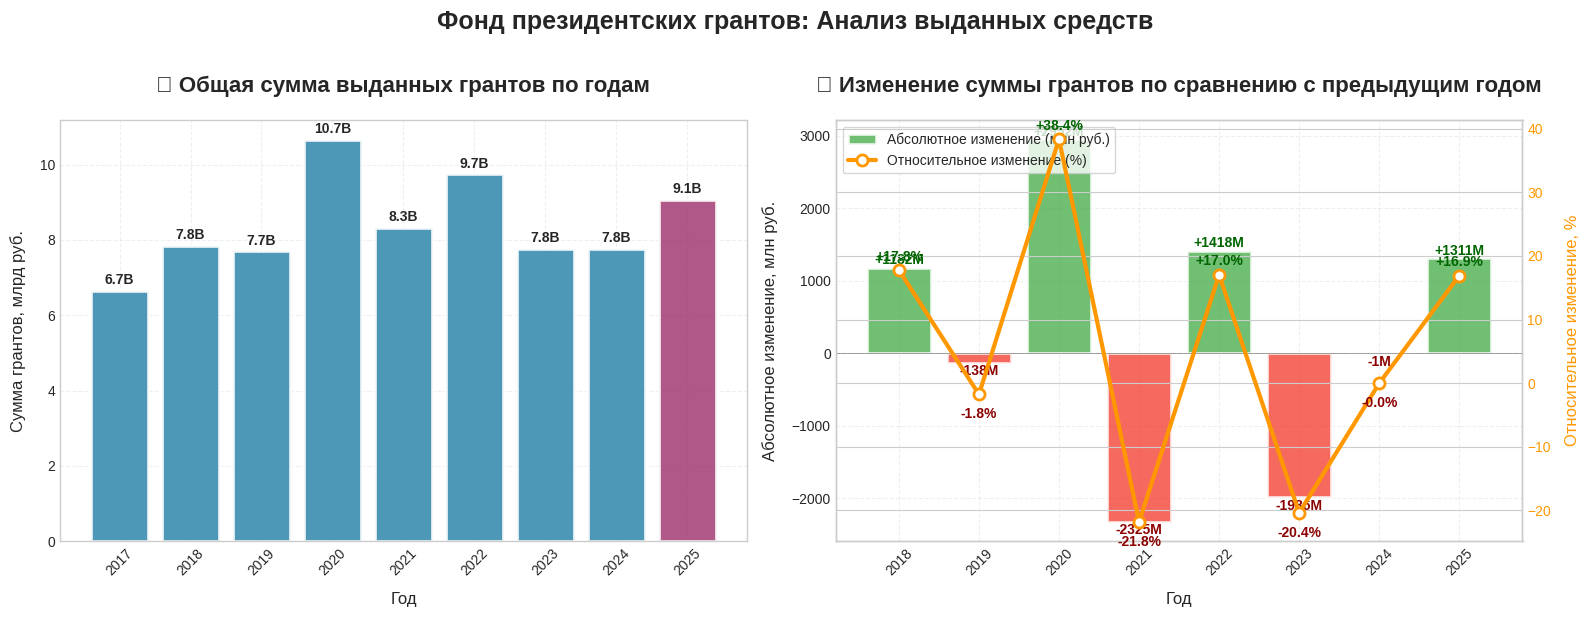

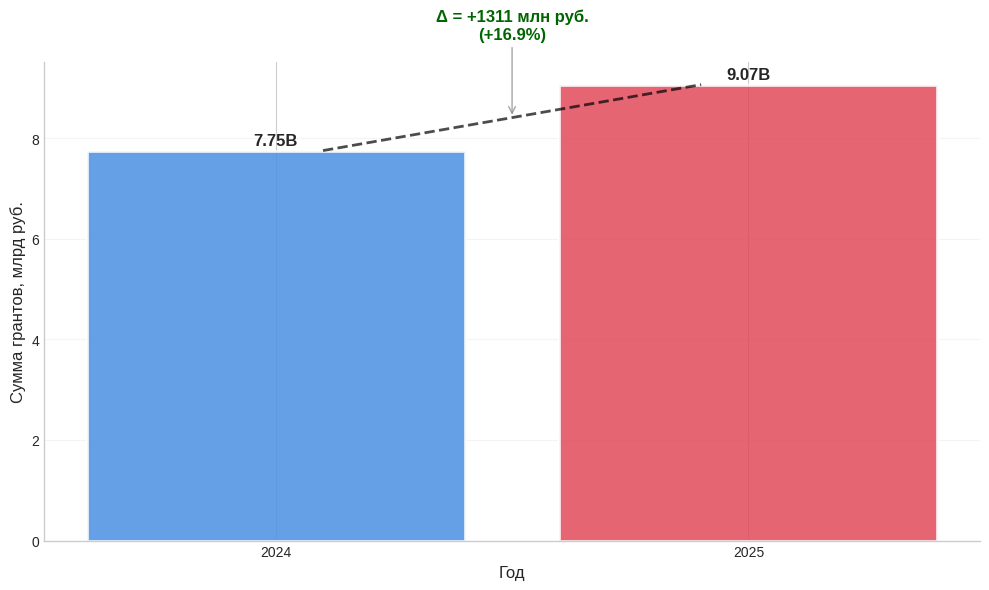

In [15]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
bars = ax1.bar(grant_sum_by_year['year'].astype(str), 
               grant_sum_by_year['total_grant'] / 1e9, 
               color=['#2E86AB' if i < len(grant_sum_by_year)-1 else '#A23B72' 
                      for i in range(len(grant_sum_by_year))],
               edgecolor='white',
               linewidth=2,
               alpha=0.85)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}B',
             ha='center', va='bottom',
             fontsize=10, fontweight='bold')
ax1.set_title('📊 Общая сумма выданных грантов по годам', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Сумма грантов, млрд руб.', fontsize=12, labelpad=10)
ax1.set_xlabel('Год', fontsize=12, labelpad=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, linestyle='--')

ax2_twin = ax2.twinx()
change_data = grant_sum_by_year.dropna(subset=['absolute_change'])
colors_change = ['#4CAF50' if x > 0 else '#F44336' for x in change_data['absolute_change']]
bars_change = ax2.bar(change_data['year'].astype(str),
                      change_data['absolute_change'] / 1e6, 
                      color=colors_change,
                      alpha=0.8,
                      edgecolor='white',
                      linewidth=2,
                      label='Абсолютное изменение (млн руб.)')

for bar, change in zip(bars_change, change_data['absolute_change']):
    height = bar.get_height()
    color = 'darkgreen' if change > 0 else 'darkred'
    va = 'bottom' if height > 0 else 'top'
    y_offset = 5 if height > 0 else -15
    
    ax2.text(bar.get_x() + bar.get_width()/2., height + y_offset,
             f'{change/1e6:+.0f}M',
             ha='center', va=va,
             fontsize=10, fontweight='bold',
             color=color)

line = ax2_twin.plot(change_data['year'].astype(str),
                     change_data['relative_change_pct'],
                     color='#FF9800',
                     marker='o',
                     markersize=8,
                     linewidth=3,
                     label='Относительное изменение (%)',
                     markerfacecolor='white',
                     markeredgewidth=2)

for i, (year, pct) in enumerate(zip(change_data['year'], change_data['relative_change_pct'])):
    color = 'darkgreen' if pct > 0 else 'darkred'
    ax2_twin.text(i, pct + (1 if pct > 0 else -2),
                  f'{pct:+.1f}%',
                  ha='center', va='bottom' if pct > 0 else 'top',
                  fontsize=10, fontweight='bold',
                  color=color)

ax2.set_title('📈 Изменение суммы грантов по сравнению с предыдущим годом', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('Абсолютное изменение, млн руб.', fontsize=12, labelpad=10)
ax2_twin.set_ylabel('Относительное изменение, %', fontsize=12, labelpad=10, color='#FF9800')
ax2.set_xlabel('Год', fontsize=12, labelpad=10)
ax2.tick_params(axis='x', rotation=45)
ax2_twin.tick_params(axis='y', labelcolor='#FF9800')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)
ax2.grid(True, alpha=0.3, linestyle='--')
fig.suptitle('Фонд президентских грантов: Анализ выданных средств', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

if len(grant_sum_by_year) >= 2:
    fig3, ax3 = plt.subplots(figsize=(10, 6))
    last_two = grant_sum_by_year.tail(2)
    colors_compare = ['#4A90E2', '#E24A5A']
    
    bars_compare = ax3.bar(last_two['year'].astype(str), 
                           last_two['total_grant'] / 1e9,
                           color=colors_compare,
                           alpha=0.85,
                           edgecolor='white',
                           linewidth=2)
    for bar in bars_compare:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                 f'{height:.2f}B',
                 ha='center', va='bottom',
                 fontsize=12, fontweight='bold')
    change_value = last_two.iloc[1]['absolute_change']
    change_pct = last_two.iloc[1]['relative_change_pct']
    ax3.plot([0.1, 0.9], [last_two.iloc[0]['total_grant']/1e9, last_two.iloc[1]['total_grant']/1e9],
             color='black', linewidth=2, linestyle='--', alpha=0.7)
    ax3.annotate(f'Δ = {change_value/1e6:+.0f} млн руб.\n({change_pct:+.1f}%)',
                 xy=(0.5, (last_two.iloc[0]['total_grant']/1e9 + last_two.iloc[1]['total_grant']/1e9)/2),
                 xytext=(0.5, max(last_two['total_grant']/1e9) * 1.1),
                 ha='center',
                 fontsize=12,
                 fontweight='bold',
                 color='darkgreen' if change_value > 0 else 'darkred',
                 arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7))
    ax3.set_ylabel('Сумма грантов, млрд руб.', fontsize=12)
    ax3.set_xlabel('Год', fontsize=12)
    ax3.grid(True, alpha=0.2, axis='y')
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()
latest_year = grant_sum_by_year['year'].max()
latest_data = grant_sum_by_year[grant_sum_by_year['year'] == latest_year]
if len(latest_data) > 0:
    latest_grant = latest_data['total_grant'].values[0]
    if len(grant_sum_by_year) >= 2:
        prev_data = grant_sum_by_year[grant_sum_by_year['year'] == latest_year - 1]
        if len(prev_data) > 0:
            prev_grant = prev_data['total_grant'].values[0]
            change = latest_grant - prev_grant
            change_pct = (change / prev_grant) * 100

In [16]:
region_counts = winners['region'].value_counts().head(20)  # топ-20 регионов

## Как проекты распределены по регионам, регионам реализации, направлениям и целевым группам.

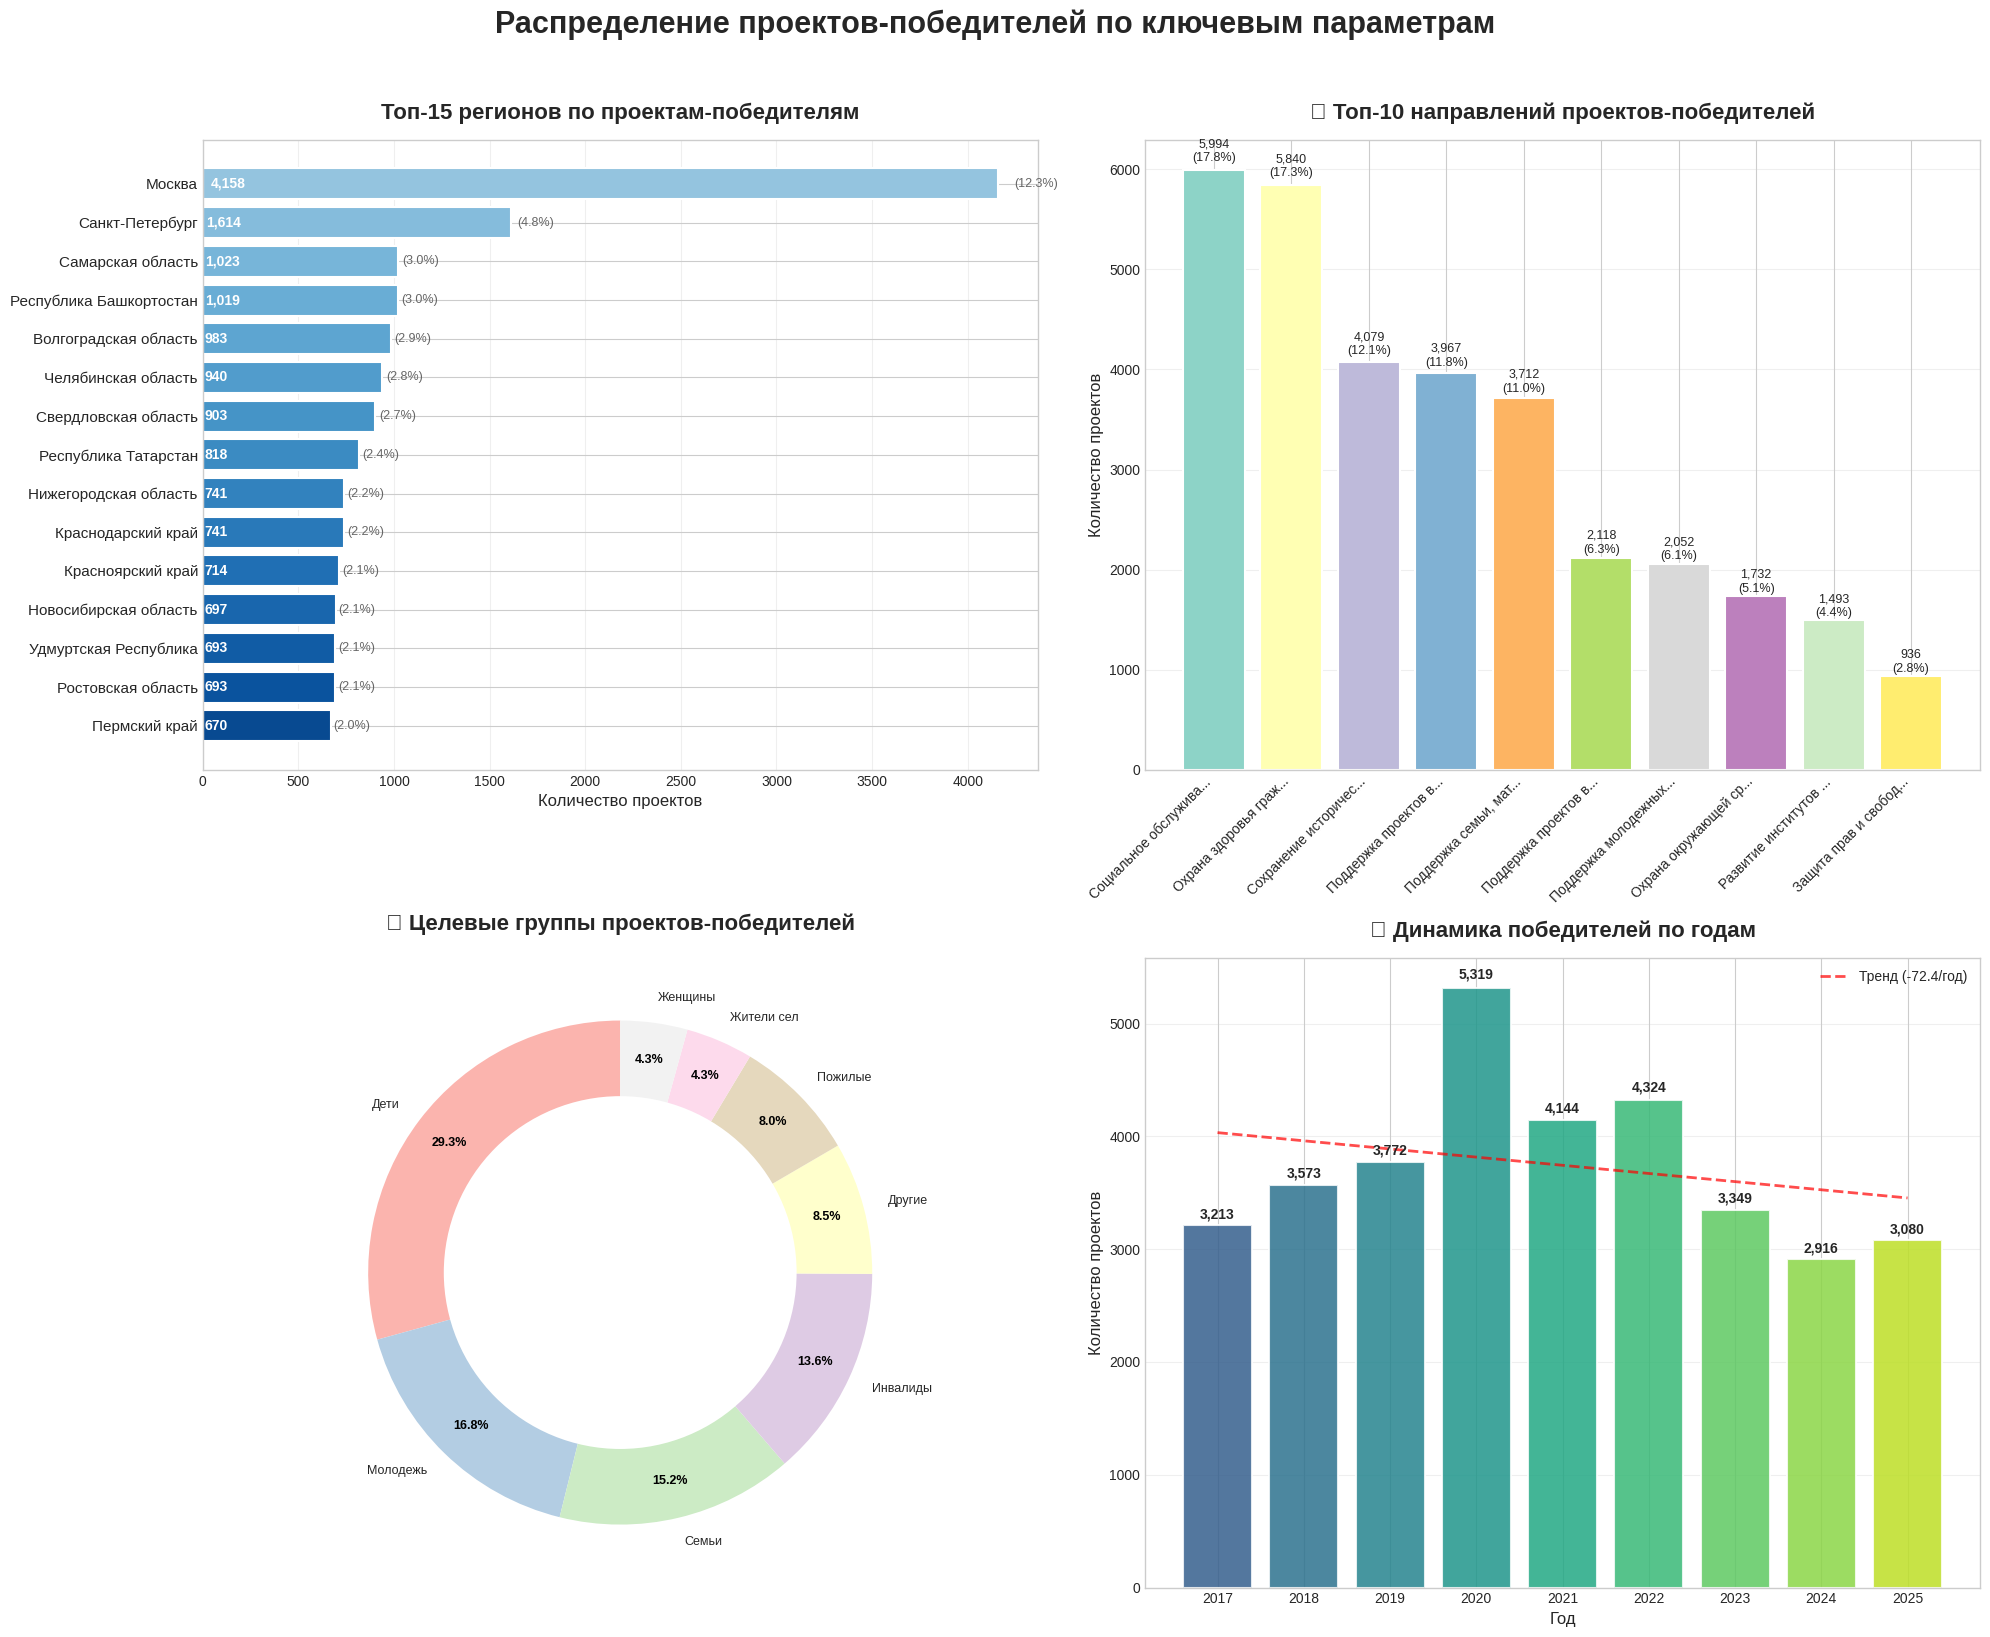

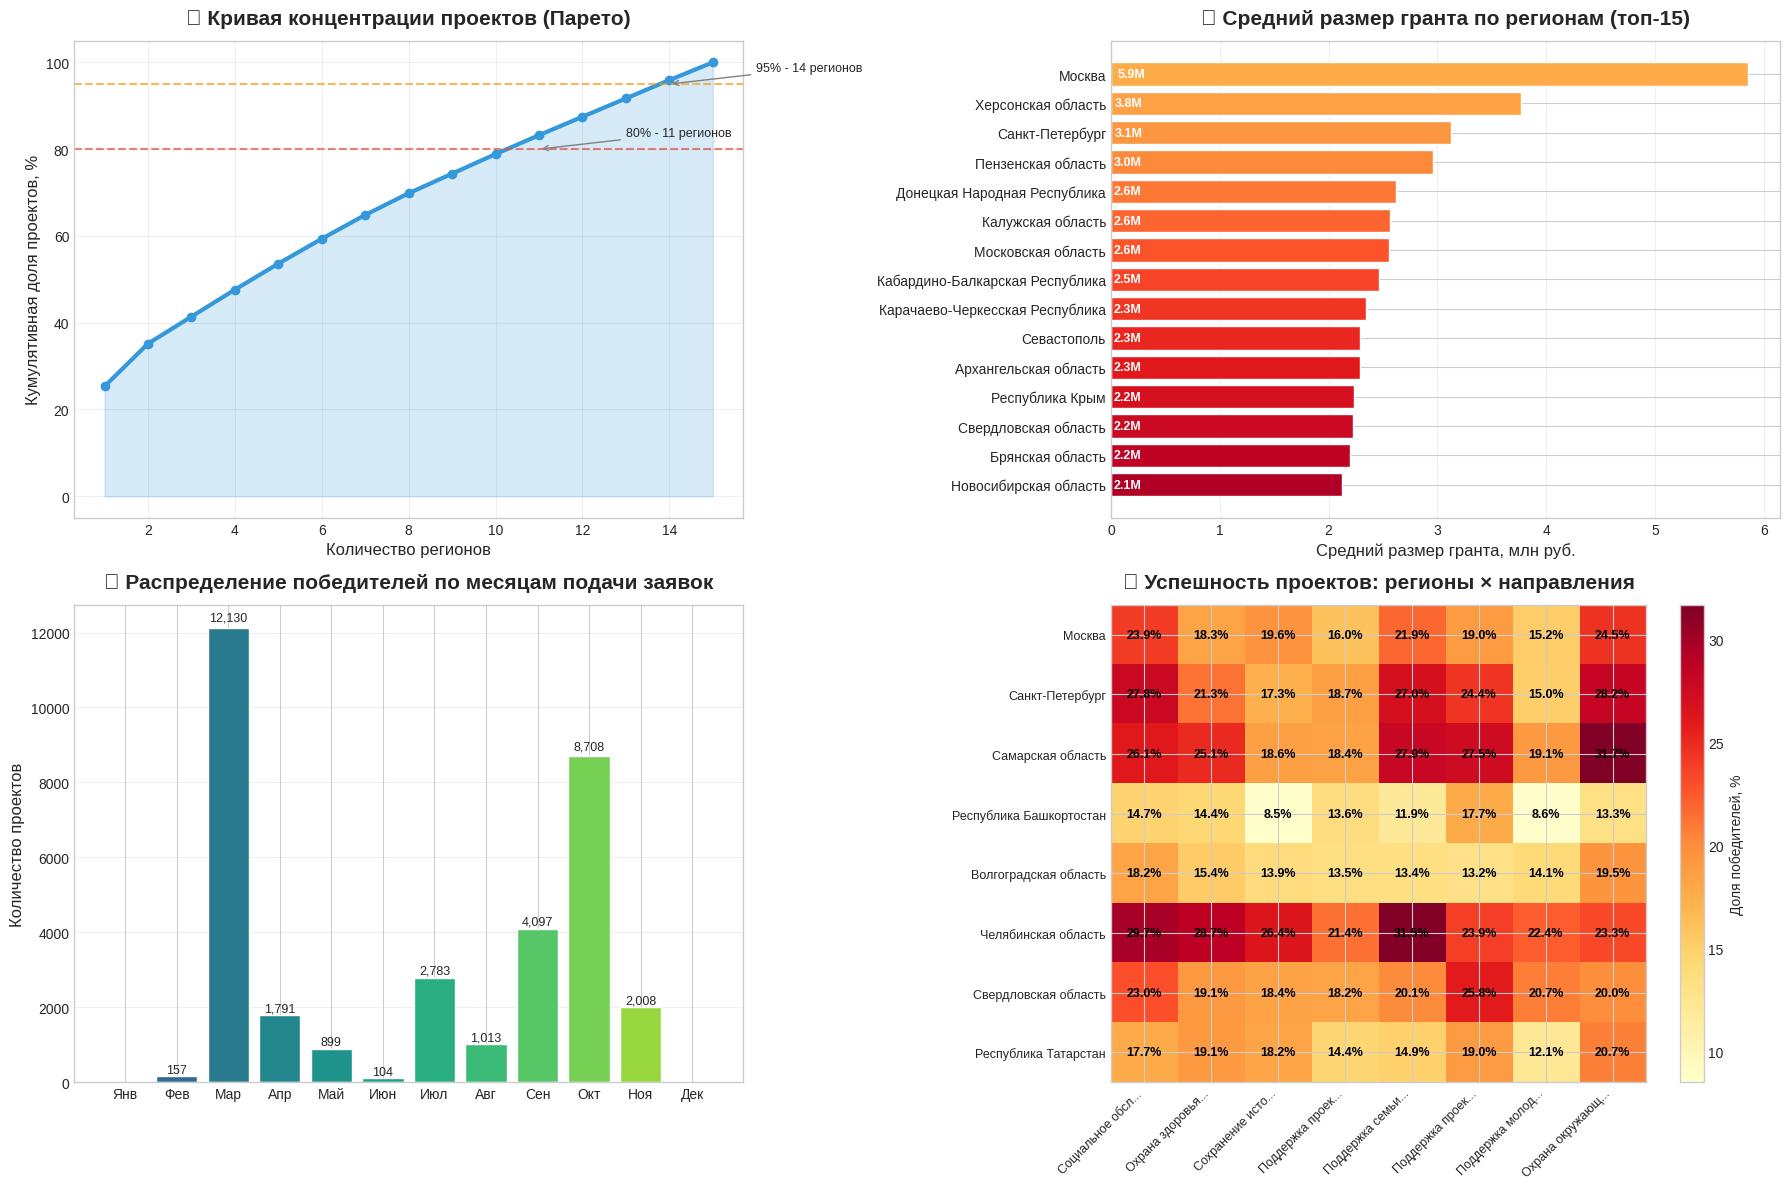

In [20]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

fig = plt.figure(figsize=(20, 16))
fig.suptitle('Распределение проектов-победителей по ключевым параметрам', 
             fontsize=22, fontweight='bold', y=1.02)

ax1 = plt.subplot(2, 2, 1)
region_counts = winners['region'].value_counts().head(15)
colors_region = cm.Blues(np.linspace(0.4, 0.9, len(region_counts)))
bars1 = ax1.barh(range(len(region_counts)), region_counts.values, 
                 color=colors_region, edgecolor='white', linewidth=1.5)
ax1.set_yticks(range(len(region_counts)))
ax1.set_yticklabels(region_counts.index, fontsize=11)
ax1.invert_yaxis()

for i, (bar, value) in enumerate(zip(bars1, region_counts.values)):
    percentage = (value / len(winners)) * 100
    ax1.text(value * 0.01, bar.get_y() + bar.get_height()/2,
             f'{value:,}', ha='left', va='center',
             fontsize=10, fontweight='bold', color='white')
    ax1.text(value * 1.02, bar.get_y() + bar.get_height()/2,
             f'({percentage:.1f}%)', ha='left', va='center',
             fontsize=9, color='#666666')

ax1.set_title('Топ-15 регионов по проектам-победителям', 
              fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('Количество проектов', fontsize=12)
ax1.grid(True, alpha=0.3, axis='x')

ax2 = plt.subplot(2, 2, 2)
direction_counts = winners['direction'].value_counts().head(10)
colors_dir = cm.Set3(np.linspace(0, 1, len(direction_counts)))
bars2 = ax2.bar(range(len(direction_counts)), direction_counts.values,
                color=colors_dir, edgecolor='white', linewidth=1.5)
ax2.set_xticks(range(len(direction_counts)))
ax2.set_xticklabels([d[:20] + '...' if len(d) > 20 else d 
                    for d in direction_counts.index], 
                    rotation=45, ha='right', fontsize=10)

for bar, value in zip(bars2, direction_counts.values):
    height = bar.get_height()
    percentage = (value / len(winners)) * 100
    ax2.text(bar.get_x() + bar.get_width()/2, height * 1.01,
             f'{value:,}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=9)

ax2.set_title('🎯 Топ-10 направлений проектов-победителей', 
              fontsize=16, fontweight='bold', pad=15)
ax2.set_ylabel('Количество проектов', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

ax3 = plt.subplot(2, 2, 3)

def analyze_target_groups(text):
    if pd.isna(text):
        return []
    text_lower = str(text).lower()
    groups = []
    patterns = {
        'Дети': ['дети', 'ребенок', 'подростк', 'школьник', 'воспитанник'],
        'Молодежь': ['молодеж', 'студент', 'юнош', 'девушк'],
        'Пожилые': ['пенсионер', 'пожил', 'ветеран', 'престарел'],
        'Инвалиды': ['инвалид', 'овз', 'ограничен'],
        'Семьи': ['семь', 'родител', 'матер', 'отц'],
        'Женщины': ['женщин', 'матер', 'девушк'],
        'Мигранты': ['мигрант', 'бежен', 'переселен'],
        'Жители сел': ['сельск', 'сел', 'деревн']
    }
    for group, keywords in patterns.items():
        if any(keyword in text_lower for keyword in keywords):
            groups.append(group)
    return groups if groups else ['Другие']

all_targets = []
for text in winners['target_groups'].fillna('Не указано'):
    all_targets.extend(analyze_target_groups(text))
target_counts = pd.Series(all_targets).value_counts().head(8)

wedges, texts, autotexts = ax3.pie(target_counts.values,
                                   labels=target_counts.index,
                                   autopct='%1.1f%%',
                                   colors=cm.Pastel1(np.linspace(0, 1, len(target_counts))),
                                   startangle=90,
                                   pctdistance=0.85,
                                   textprops={'fontsize': 9})
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

centre_circle = plt.Circle((0,0),0.70,fc='white')
ax3.add_artist(centre_circle)
ax3.set_title('👥 Целевые группы проектов-победителей', 
              fontsize=16, fontweight='bold', pad=20)

ax4 = plt.subplot(2, 2, 4)
winners_by_year = winners['year'].value_counts().sort_index()
colors_year = cm.viridis(np.linspace(0.3, 0.9, len(winners_by_year)))
bars4 = ax4.bar(winners_by_year.index.astype(str), winners_by_year.values,
                color=colors_year, edgecolor='white', linewidth=1.5, alpha=0.85)

for bar, value in zip(bars4, winners_by_year.values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height * 1.01,
             f'{value:,}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

x_numeric = np.arange(len(winners_by_year))
z = np.polyfit(x_numeric, winners_by_year.values, 1)
p = np.poly1d(z)
ax4.plot(winners_by_year.index.astype(str), p(x_numeric), 
         color='red', linewidth=2, linestyle='--', alpha=0.7,
         label=f'Тренд ({z[0]:+.1f}/год)')

ax4.set_title('📅 Динамика победителей по годам', 
              fontsize=16, fontweight='bold', pad=15)
ax4.set_xlabel('Год', fontsize=12)
ax4.set_ylabel('Количество проектов', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

fig2, ((ax2_1, ax2_2), (ax2_3, ax2_4)) = plt.subplots(2, 2, figsize=(18, 12))

ax2_1.plot(range(1, len(region_counts) + 1), 
           region_counts.cumsum() / region_counts.sum() * 100,
           linewidth=3, color='#3498db', marker='o', markersize=6)
ax2_1.fill_between(range(1, len(region_counts) + 1),
                   region_counts.cumsum() / region_counts.sum() * 100,
                   alpha=0.2, color='#3498db')
ax2_1.axhline(y=80, color='#e74c3c', linestyle='--', alpha=0.7, linewidth=1.5)
ax2_1.axhline(y=95, color='#f39c12', linestyle='--', alpha=0.7, linewidth=1.5)

for target in [80, 95]:
    idx = np.where(region_counts.cumsum() / region_counts.sum() * 100 >= target)[0]
    if len(idx) > 0:
        n_regions = idx[0] + 1
        ax2_1.annotate(f'{target}% - {n_regions} регионов',
                      xy=(n_regions, target),
                      xytext=(n_regions + 2, target + 3),
                      arrowprops=dict(arrowstyle='->', color='gray'),
                      fontsize=9)

ax2_1.set_title('📊 Кривая концентрации проектов (Парето)', 
                fontsize=15, fontweight='bold', pad=12)
ax2_1.set_xlabel('Количество регионов', fontsize=12)
ax2_1.set_ylabel('Кумулятивная доля проектов, %', fontsize=12)
ax2_1.grid(True, alpha=0.3)

if 'money_req_grant' in winners.columns:
    avg_grant_by_region = winners.groupby('region')['money_req_grant'].mean().sort_values(ascending=False).head(15)
    colors_avg = cm.YlOrRd(np.linspace(0.4, 0.9, len(avg_grant_by_region)))
    bars_avg = ax2_2.barh(range(len(avg_grant_by_region)), 
                         avg_grant_by_region.values / 1e6,
                         color=colors_avg, edgecolor='white', linewidth=1)
    ax2_2.set_yticks(range(len(avg_grant_by_region)))
    ax2_2.set_yticklabels(avg_grant_by_region.index, fontsize=10)
    ax2_2.invert_yaxis()
    for i, (bar, value) in enumerate(zip(bars_avg, avg_grant_by_region.values)):
        ax2_2.text(value/1e6 * 0.01, bar.get_y() + bar.get_height()/2,
                  f'{value/1e6:.1f}M', ha='left', va='center',
                  fontsize=9, fontweight='bold', color='white')
    ax2_2.set_title('💰 Средний размер гранта по регионам (топ-15)', 
                    fontsize=15, fontweight='bold', pad=12)
    ax2_2.set_xlabel('Средний размер гранта, млн руб.', fontsize=12)
    ax2_2.grid(True, alpha=0.3, axis='x')

if 'date_req' in winners.columns:
    try:
        winners['month'] = pd.to_datetime(winners['date_req']).dt.month
        month_counts = winners['month'].value_counts().sort_index()
        month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
                      'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
        colors_month = cm.viridis(np.linspace(0.3, 0.9, 12))
        bars_month = ax2_3.bar(range(1, 13), 
                              [month_counts.get(m, 0) for m in range(1, 13)],
                              color=colors_month, edgecolor='white', linewidth=1)
        ax2_3.set_xticks(range(1, 13))
        ax2_3.set_xticklabels(month_names, fontsize=10)
        for bar, value in zip(bars_month, [month_counts.get(m, 0) for m in range(1, 13)]):
            if value > 0:
                ax2_3.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.01,
                          f'{value:,}', ha='center', va='bottom', fontsize=9)
        ax2_3.set_title('📅 Распределение победителей по месяцам подачи заявок', 
                       fontsize=15, fontweight='bold', pad=12)
        ax2_3.set_ylabel('Количество проектов', fontsize=12)
        ax2_3.grid(True, alpha=0.3, axis='y')
    except:
        ax2_3.text(0.5, 0.5, 'Данные о датах недоступны', 
                  ha='center', va='center', fontsize=12)
        ax2_3.set_title('📅 Распределение по месяцам', fontsize=15, fontweight='bold', pad=12)

top_regions_heat = region_counts.head(8).index
top_directions_heat = direction_counts.head(8).index
success_matrix = pd.DataFrame(index=top_regions_heat, columns=top_directions_heat)

for region in top_regions_heat:
    for direction in top_directions_heat:
        region_dir_data = grants_df[(grants_df['region'] == region) & 
                                   (grants_df['direction'] == direction)]
        if len(region_dir_data) > 0:
            winners_count = len(region_dir_data[region_dir_data['winner'] == True])
            success_rate = (winners_count / len(region_dir_data)) * 100
            success_matrix.loc[region, direction] = success_rate
        else:
            success_matrix.loc[region, direction] = np.nan

success_matrix = success_matrix.astype(float)
im = ax2_4.imshow(success_matrix, cmap='YlOrRd', aspect='auto')

for i in range(len(top_regions_heat)):
    for j in range(len(top_directions_heat)):
        value = success_matrix.iloc[i, j]
        if not np.isnan(value):
            color = 'white' if value > 50 else 'black'
            ax2_4.text(j, i, f'{value:.1f}%', 
                      ha='center', va='center',
                      color=color, fontsize=9, fontweight='bold')

ax2_4.set_xticks(range(len(top_directions_heat)))
ax2_4.set_xticklabels([d[:15] + '...' if len(d) > 15 else d 
                      for d in top_directions_heat], 
                      rotation=45, ha='right', fontsize=9)
ax2_4.set_yticks(range(len(top_regions_heat)))
ax2_4.set_yticklabels(top_regions_heat, fontsize=9)
ax2_4.set_title('🔥 Успешность проектов: регионы × направления', 
               fontsize=15, fontweight='bold', pad=12)
plt.colorbar(im, ax=ax2_4, label='Доля победителей, %')

plt.tight_layout()
plt.show()

# Часть 2
> Cтатистика всех постов топовых каналов о киноиндустрии за январь 2024 года

In [21]:
posts_df = pd.read_excel("/home/zorinep/big_data_magistracy/vizualize/datasets/media-jan-total-new.xlsx")
posts_df.head()

,date,datetime,link,subscribers,text,text_signs,views,forwards,reactions,channel,...,emoji_🗿,emoji_😇,emoji_🍌,emoji_🥱,emoji_👻,emoji_🦄,emoji_🤪,emoji_🤷‍♂,emoji_💅,emoji_🙉
0,2024-01-31,2024-01-31 19:04:06,https://t.me/vodott/5773,10849,От вида этого грузовика-порошкососа в пиар-отд...,146,2400,28,NaN,vodott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-31,2024-01-31 17:49:06,https://t.me/vodott/5770,10849,А вот еще немного статистики из исследования T...,1075,2223,27,NaN,vodott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-31,2024-01-31 16:24:03,https://t.me/vodott/5769,10849,Кто задавал сериальные тренды в 2023 году? Инд...,837,1973,8,NaN,vodott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-31,2024-01-31 13:02:03,https://t.me/vodott/5767,10849,Стриминг пробивает потолок — в декабре прошлог...,797,2223,22,NaN,vodott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-31,2024-01-31 11:02:03,https://t.me/vodott/5766,10849,"Крутая картинка, слабая автономность и неудобс...",1946,2338,8,NaN,vodott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

posts_df = pd.read_excel("/home/zorinep/big_data_magistracy/vizualize/datasets/media-jan-total-new.xlsx")
posts_df.head()

,date,datetime,link,subscribers,text,text_signs,views,forwards,reactions,channel,...,emoji_🗿,emoji_😇,emoji_🍌,emoji_🥱,emoji_👻,emoji_🦄,emoji_🤪,emoji_🤷‍♂,emoji_💅,emoji_🙉
0,2024-01-31,2024-01-31 19:04:06,https://t.me/vodott/5773,10849,От вида этого грузовика-порошкососа в пиар-отд...,146,2400,28,NaN,vodott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-31,2024-01-31 17:49:06,https://t.me/vodott/5770,10849,А вот еще немного статистики из исследования T...,1075,2223,27,NaN,vodott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-31,2024-01-31 16:24:03,https://t.me/vodott/5769,10849,Кто задавал сериальные тренды в 2023 году? Инд...,837,1973,8,NaN,vodott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-31,2024-01-31 13:02:03,https://t.me/vodott/5767,10849,Стриминг пробивает потолок — в декабре прошлог...,797,2223,22,NaN,vodott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-31,2024-01-31 11:02:03,https://t.me/vodott/5766,10849,"Крутая картинка, слабая автономность и неудобс...",1946,2338,8,NaN,vodott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
posts_df['datetime'] = pd.to_datetime(posts_df['datetime'])
posts_df['date'] = pd.to_datetime(posts_df['date'])
posts_df['day_of_week'] = posts_df['datetime'].dt.day_name()
posts_df['hour'] = posts_df['datetime'].dt.hour
posts_df['day'] = posts_df['datetime'].dt.day
posts_df['week_number'] = posts_df['datetime'].dt.isocalendar().week

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Утро (5-11)'
    elif 12 <= hour < 17:
        return 'День (12-16)'
    elif 17 <= hour < 22:
        return 'Вечер (17-21)'
    else:
        return 'Ночь (22-4)'

posts_df['time_period'] = posts_df['hour'].apply(time_of_day)

def parse_reactions(json_str):
    try:
        if pd.isna(json_str):
            return {}
        if isinstance(json_str, str):
            return json.loads(json_str)
        return json_str
    except:
        return {}

posts_df['reactions_parsed'] = posts_df['reactions'].apply(parse_reactions)

posts_df['engagement_rate'] = (posts_df['reactions_count'] + posts_df['forwards']) / posts_df['views'] * 100
posts_df['views_per_subscriber'] = posts_df['views'] / posts_df['subscribers']
posts_df['text_density'] = posts_df['text_signs'] / (posts_df['views'] + 1)  # +1 чтобы избежать деления на 0
emoji_columns = [col for col in posts_df.columns if col.startswith('emoji_')]
posts_df['total_emojis'] = posts_df[emoji_columns].sum(axis=1)

# 1. АНАЛИЗ АКТИВНОСТИ ПО ДНЯМ И ВРЕМЕНИ
График 1.1: Активность по дням недели

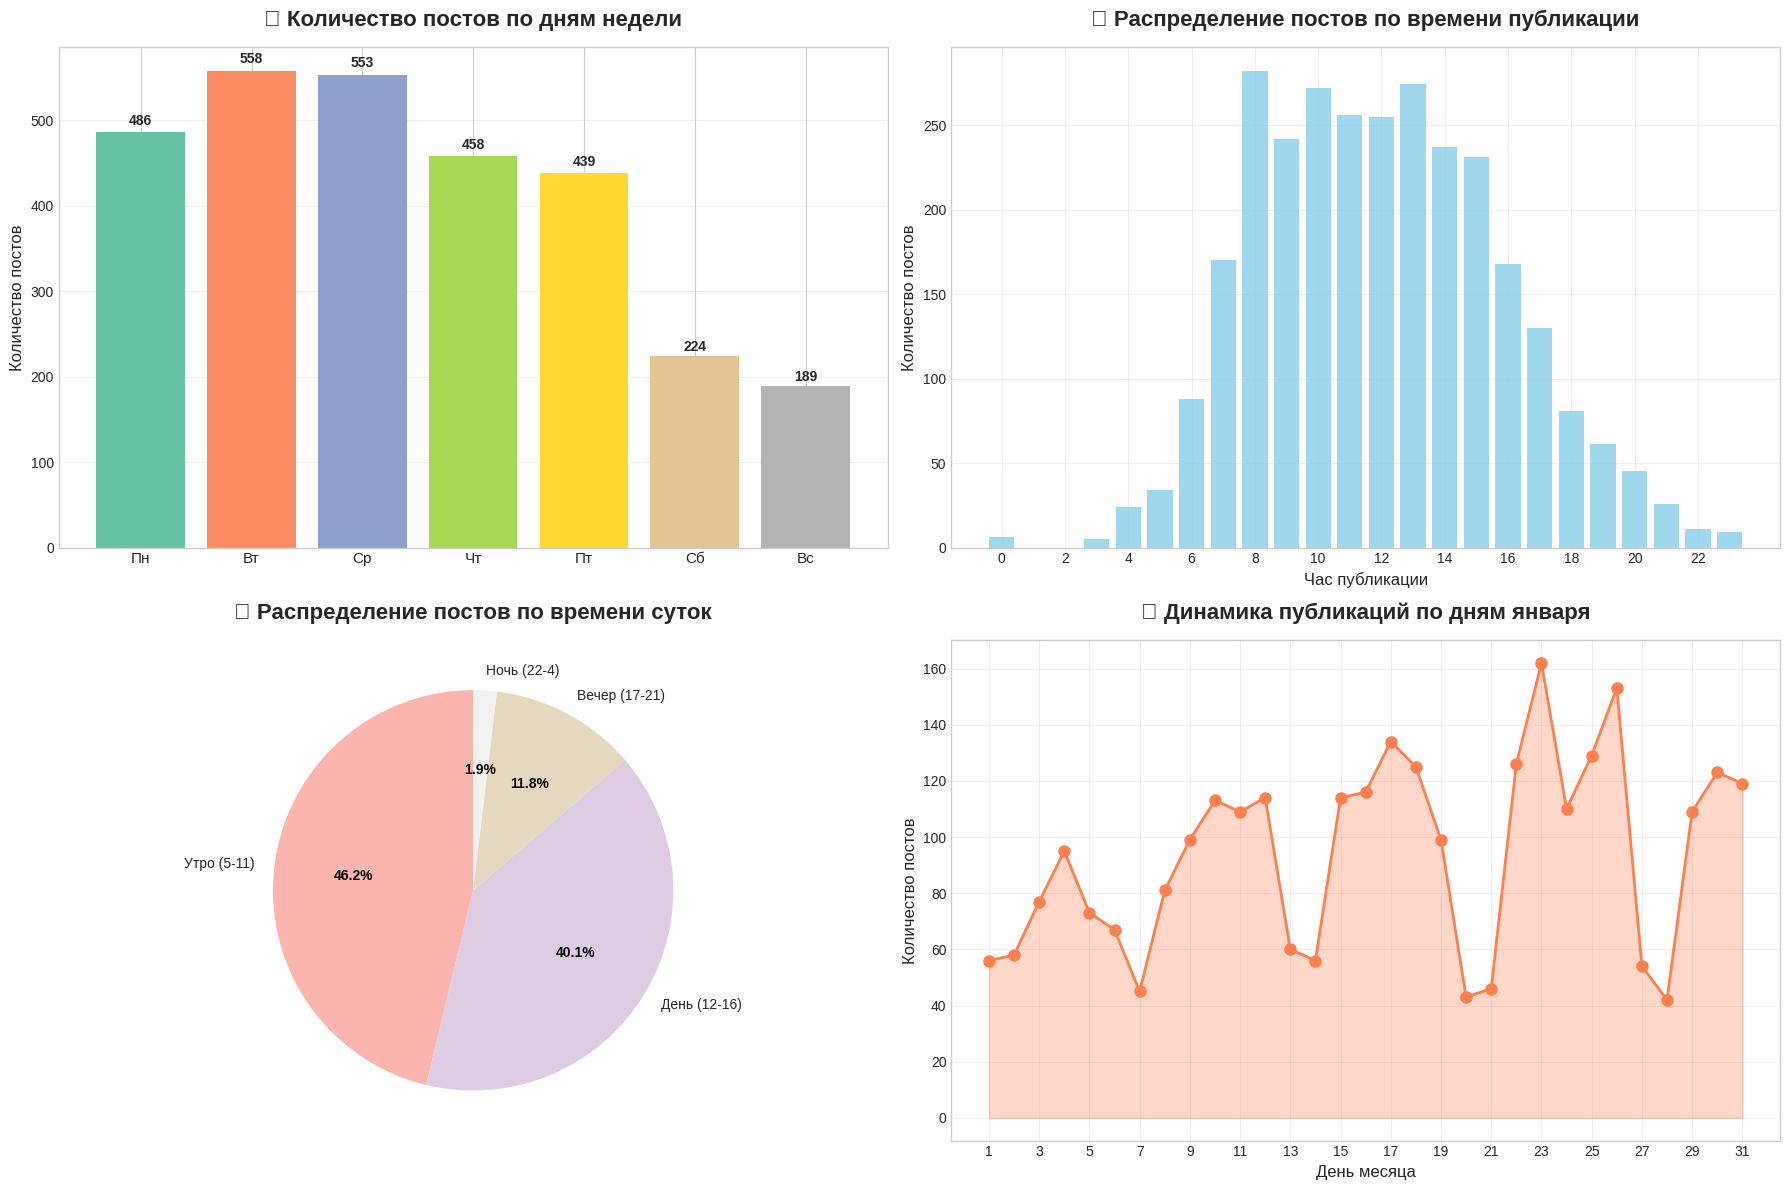

In [ ]:

fig1 = plt.figure(figsize=(18, 12))
ax1 = plt.subplot(2, 2, 1)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
posts_by_day = posts_df['day_of_week'].value_counts().reindex(day_order)
colors_day = plt.cm.Set2(np.linspace(0, 1, 7))
bars1 = ax1.bar(range(len(posts_by_day)), posts_by_day.values, color=colors_day)

ax1.set_xticks(range(len(posts_by_day)))
ax1.set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'], fontsize=11)
for bar, value in zip(bars1, posts_by_day.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height * 1.01,
             f'{value}', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax1.set_title('📅 Количество постов по дням недели', fontsize=16, fontweight='bold', pad=15)
ax1.set_ylabel('Количество постов', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# График 1.2: Активность по часам
ax2 = plt.subplot(2, 2, 2)
posts_by_hour = posts_df['hour'].value_counts().sort_index()
ax2.bar(posts_by_hour.index, posts_by_hour.values, color='skyblue', alpha=0.8)
ax2.set_xlabel('Час публикации', fontsize=12)
ax2.set_ylabel('Количество постов', fontsize=12)
ax2.set_xticks(range(0, 24, 2))
ax2.set_title('🕐 Распределение постов по времени публикации', fontsize=16, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3)

# График 1.3: Активность по периодам суток
ax3 = plt.subplot(2, 2, 3)
time_period_order = ['Утро (5-11)', 'День (12-16)', 'Вечер (17-21)', 'Ночь (22-4)']
posts_by_time = posts_df['time_period'].value_counts().reindex(time_period_order)
colors_time = plt.cm.Pastel1(np.linspace(0, 1, 4))
wedges, texts, autotexts = ax3.pie(posts_by_time.values, labels=posts_by_time.index,
                                   autopct='%1.1f%%', colors=colors_time, startangle=90)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
ax3.set_title('🌅 Распределение постов по времени суток', fontsize=16, fontweight='bold', pad=15)

# График 1.4: Активность по дням месяца
ax4 = plt.subplot(2, 2, 4)
posts_by_date = posts_df.groupby('day').size()
ax4.plot(posts_by_date.index, posts_by_date.values, marker='o', linewidth=2, markersize=8, color='coral')
ax4.fill_between(posts_by_date.index, posts_by_date.values, alpha=0.3, color='coral')
ax4.set_xlabel('День месяца', fontsize=12)
ax4.set_ylabel('Количество постов', fontsize=12)
ax4.set_xticks(range(1, 32, 2))
ax4.set_title('📆 Динамика публикаций по дням января', fontsize=16, fontweight='bold', pad=15)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. АНАЛИЗ КАНАЛОВ И ИХ ЭФФЕКТИВНОСТИ

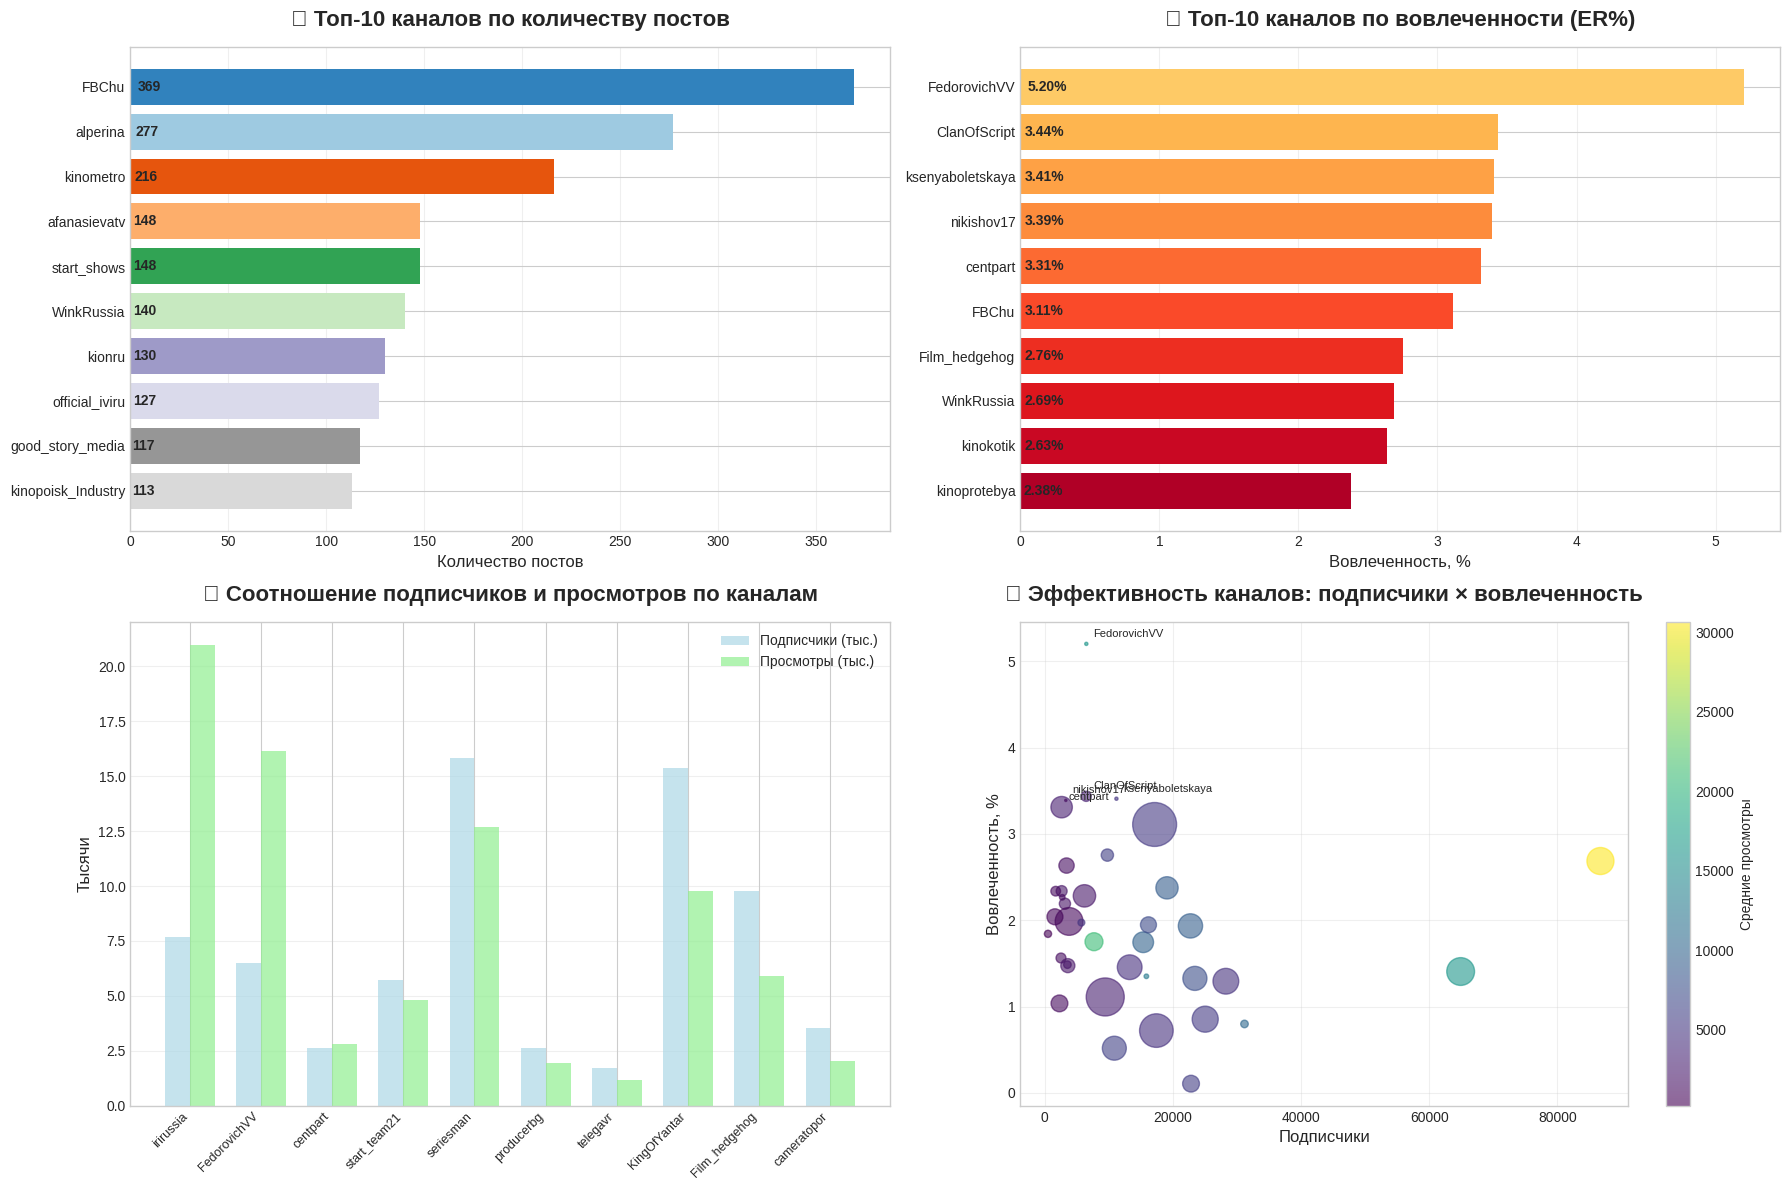

In [33]:
fig2 = plt.figure(figsize=(18, 12))
# График 2.1: Топ-10 каналов по количеству постов
ax1 = plt.subplot(2, 2, 1)
top_channels = posts_df['channel'].value_counts().head(10)
colors_ch = plt.cm.tab20c(np.linspace(0, 1, len(top_channels)))
bars1 = ax1.barh(range(len(top_channels)), top_channels.values, color=colors_ch)
ax1.set_yticks(range(len(top_channels)))
ax1.set_yticklabels(top_channels.index, fontsize=10)
ax1.invert_yaxis()
for i, (bar, value) in enumerate(zip(bars1, top_channels.values)):
    ax1.text(value * 0.01, bar.get_y() + bar.get_height()/2,
             f'{value}', ha='left', va='center', fontsize=10, fontweight='bold')
ax1.set_title('🏆 Топ-10 каналов по количеству постов', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('Количество постов', fontsize=12)
ax1.grid(True, alpha=0.3, axis='x')

ax2 = plt.subplot(2, 2, 2)
engagement_by_channel = posts_df.groupby('channel')['engagement_rate'].mean().sort_values(ascending=False).head(10)
colors_eng = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(engagement_by_channel)))
bars2 = ax2.barh(range(len(engagement_by_channel)), engagement_by_channel.values, color=colors_eng)
ax2.set_yticks(range(len(engagement_by_channel)))
ax2.set_yticklabels(engagement_by_channel.index, fontsize=10)
ax2.invert_yaxis()
for i, (bar, value) in enumerate(zip(bars2, engagement_by_channel.values)):
    ax2.text(value * 0.01, bar.get_y() + bar.get_height()/2,
             f'{value:.2f}%', ha='left', va='center', fontsize=10, fontweight='bold')
ax2.set_title('💬 Топ-10 каналов по вовлеченности (ER%)', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel('Вовлеченность, %', fontsize=12)
ax2.grid(True, alpha=0.3, axis='x')
ax3 = plt.subplot(2, 2, 3)
channel_stats = posts_df.groupby('channel').agg({
    'subscribers': 'mean',
    'views': 'mean',
    'views_per_subscriber': 'mean'
}).sort_values('views_per_subscriber', ascending=False).head(10)

x = np.arange(len(channel_stats))
width = 0.35
bars_subs = ax3.bar(x - width/2, channel_stats['subscribers'] / 1000, width, 
                    label='Подписчики (тыс.)', alpha=0.7, color='lightblue')
bars_views = ax3.bar(x + width/2, channel_stats['views'] / 1000, width,
                     label='Просмотры (тыс.)', alpha=0.7, color='lightgreen')

ax3.set_xticks(x)
ax3.set_xticklabels(channel_stats.index, rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('Тысячи', fontsize=12)
ax3.set_title('👥 Соотношение подписчиков и просмотров по каналам', 
              fontsize=16, fontweight='bold', pad=15)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

ax4 = plt.subplot(2, 2, 4)
channel_agg = posts_df.groupby('channel').agg({
    'subscribers': 'mean',
    'engagement_rate': 'mean',
    'views': 'mean',
    'link': 'count'
}).rename(columns={'link': 'post_count'})

channel_agg['bubble_size'] = channel_agg['post_count'] / channel_agg['post_count'].max() * 1000

scatter = ax4.scatter(channel_agg['subscribers'], channel_agg['engagement_rate'],
                     s=channel_agg['bubble_size'], alpha=0.6,
                     c=channel_agg['views'], cmap='viridis')

plt.colorbar(scatter, ax=ax4, label='Средние просмотры')
# топ-5 каналов
top_5_idx = channel_agg['engagement_rate'].nlargest(5).index
for idx in top_5_idx:
    ax4.annotate(idx, 
                (channel_agg.loc[idx, 'subscribers'], channel_agg.loc[idx, 'engagement_rate']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax4.set_xlabel('Подписчики', fontsize=12)
ax4.set_ylabel('Вовлеченность, %', fontsize=12)
ax4.set_title('🎯 Эффективность каналов: подписчики × вовлеченность', 
              fontsize=16, fontweight='bold', pad=15)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. АНАЛИЗ КОНТЕНТА И ЭМОДЗИ

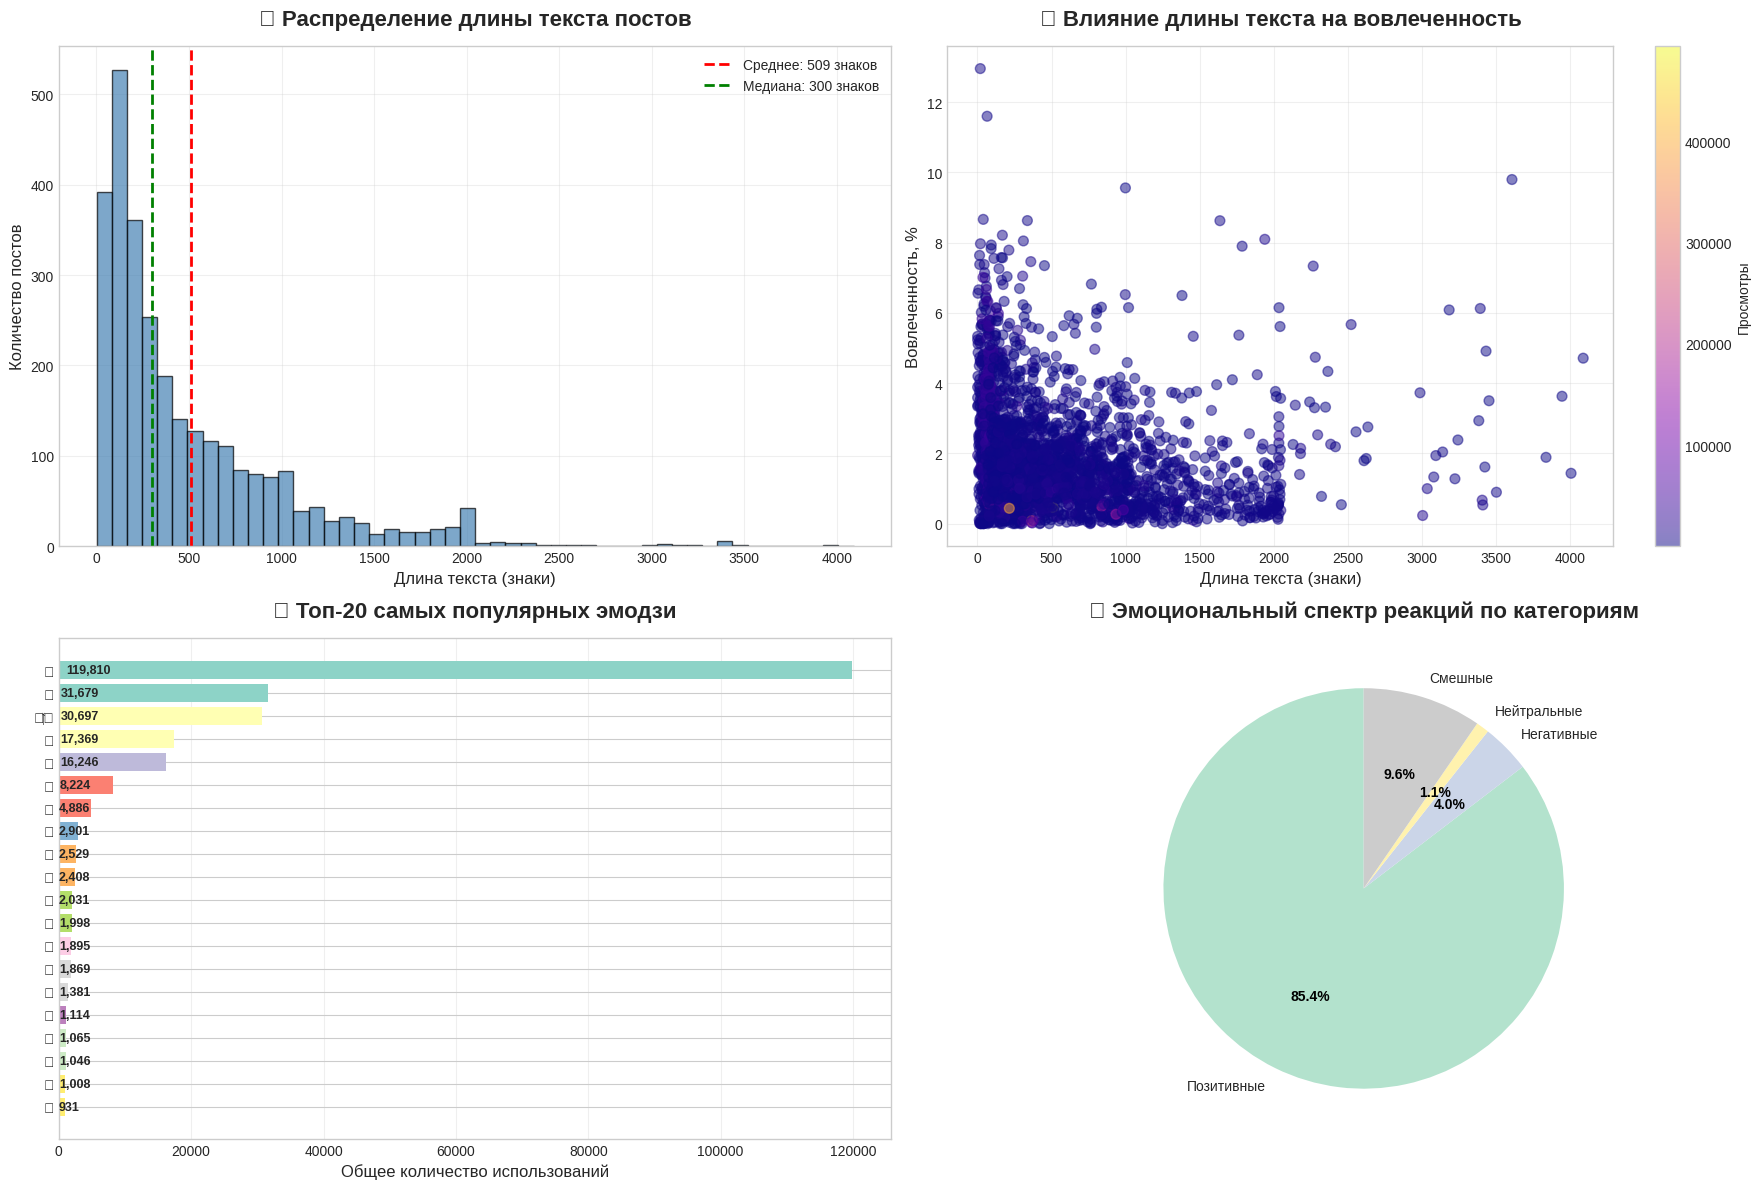

In [34]:
fig3 = plt.figure(figsize=(18, 12))
# График 3.1: Распределение длины текста
ax1 = plt.subplot(2, 2, 1)
ax1.hist(posts_df['text_signs'].dropna(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
ax1.axvline(posts_df['text_signs'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Среднее: {posts_df["text_signs"].mean():.0f} знаков')
ax1.axvline(posts_df['text_signs'].median(), color='green', linestyle='--', linewidth=2,
            label=f'Медиана: {posts_df["text_signs"].median():.0f} знаков')
ax1.set_xlabel('Длина текста (знаки)', fontsize=12)
ax1.set_ylabel('Количество постов', fontsize=12)
ax1.set_title('📝 Распределение длины текста постов', fontsize=16, fontweight='bold', pad=15)
ax1.legend()
ax1.grid(True, alpha=0.3)
# График 3.2: Корреляция длины текста и вовлеченности
ax2 = plt.subplot(2, 2, 2)
scatter = ax2.scatter(posts_df['text_signs'], posts_df['engagement_rate'], 
                     alpha=0.5, c=posts_df['views'], cmap='plasma', s=50)
ax2.set_xlabel('Длина текста (знаки)', fontsize=12)
ax2.set_ylabel('Вовлеченность, %', fontsize=12)
ax2.set_title('📊 Влияние длины текста на вовлеченность', 
              fontsize=16, fontweight='bold', pad=15)
plt.colorbar(scatter, ax=ax2, label='Просмотры')
ax2.grid(True, alpha=0.3)
# График 3.3: Топ-20 самых популярных эмодзи
ax3 = plt.subplot(2, 2, 3)
emoji_sums = posts_df[emoji_columns].sum().sort_values(ascending=False).head(20)
emoji_names = [col.replace('emoji_', '') for col in emoji_sums.index]
colors_emoji = plt.cm.Set3(np.linspace(0, 1, len(emoji_sums)))
bars3 = ax3.barh(range(len(emoji_sums)), emoji_sums.values, color=colors_emoji)
ax3.set_yticks(range(len(emoji_sums)))
ax3.set_yticklabels(emoji_names, fontsize=10)
ax3.invert_yaxis()
for i, (bar, value) in enumerate(zip(bars3, emoji_sums.values)):
    ax3.text(value * 0.01, bar.get_y() + bar.get_height()/2,
             f'{int(value):,}', ha='left', va='center', fontsize=9, fontweight='bold')
ax3.set_title('😊 Топ-20 самых популярных эмодзи', fontsize=16, fontweight='bold', pad=15)
ax3.set_xlabel('Общее количество использований', fontsize=12)
ax3.grid(True, alpha=0.3, axis='x')
# График 3.4: Эмоциональный спектр эмодзи по категориям
ax4 = plt.subplot(2, 2, 4)
# Группируем эмодзи по эмоциональным категориям
emoji_categories = {
    'Позитивные': ['❤', '👍', '😍', '🤩', '🎉', '🔥', '👏', '💯', '🥰', '😊'],
    'Негативные': ['👎', '😡', '🤬', '😢', '😭', '💩', '🤮', '😨', '😱'],
    'Нейтральные': ['🤔', '😐', '👀', '🫡', '🤨', '😴', '🥱', '🤷', '🗿'],
    'Смешные': ['🤡', '😁', '🌚', '🤣', '😎', '👻', '🤪', '🦄']
}
category_sums = {}
for category, emojis in emoji_categories.items():
    total = 0
    for emoji in emojis:
        col_name = f'emoji_{emoji}'
        if col_name in posts_df.columns:
            total += posts_df[col_name].sum()
    category_sums[category] = total

colors_cat = plt.cm.Pastel2(np.linspace(0, 1, len(category_sums)))
wedges, texts, autotexts = ax4.pie(category_sums.values(), labels=category_sums.keys(),
                                   autopct='%1.1f%%', colors=colors_cat, startangle=90)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
ax4.set_title('😄 Эмоциональный спектр реакций по категориям', 
              fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

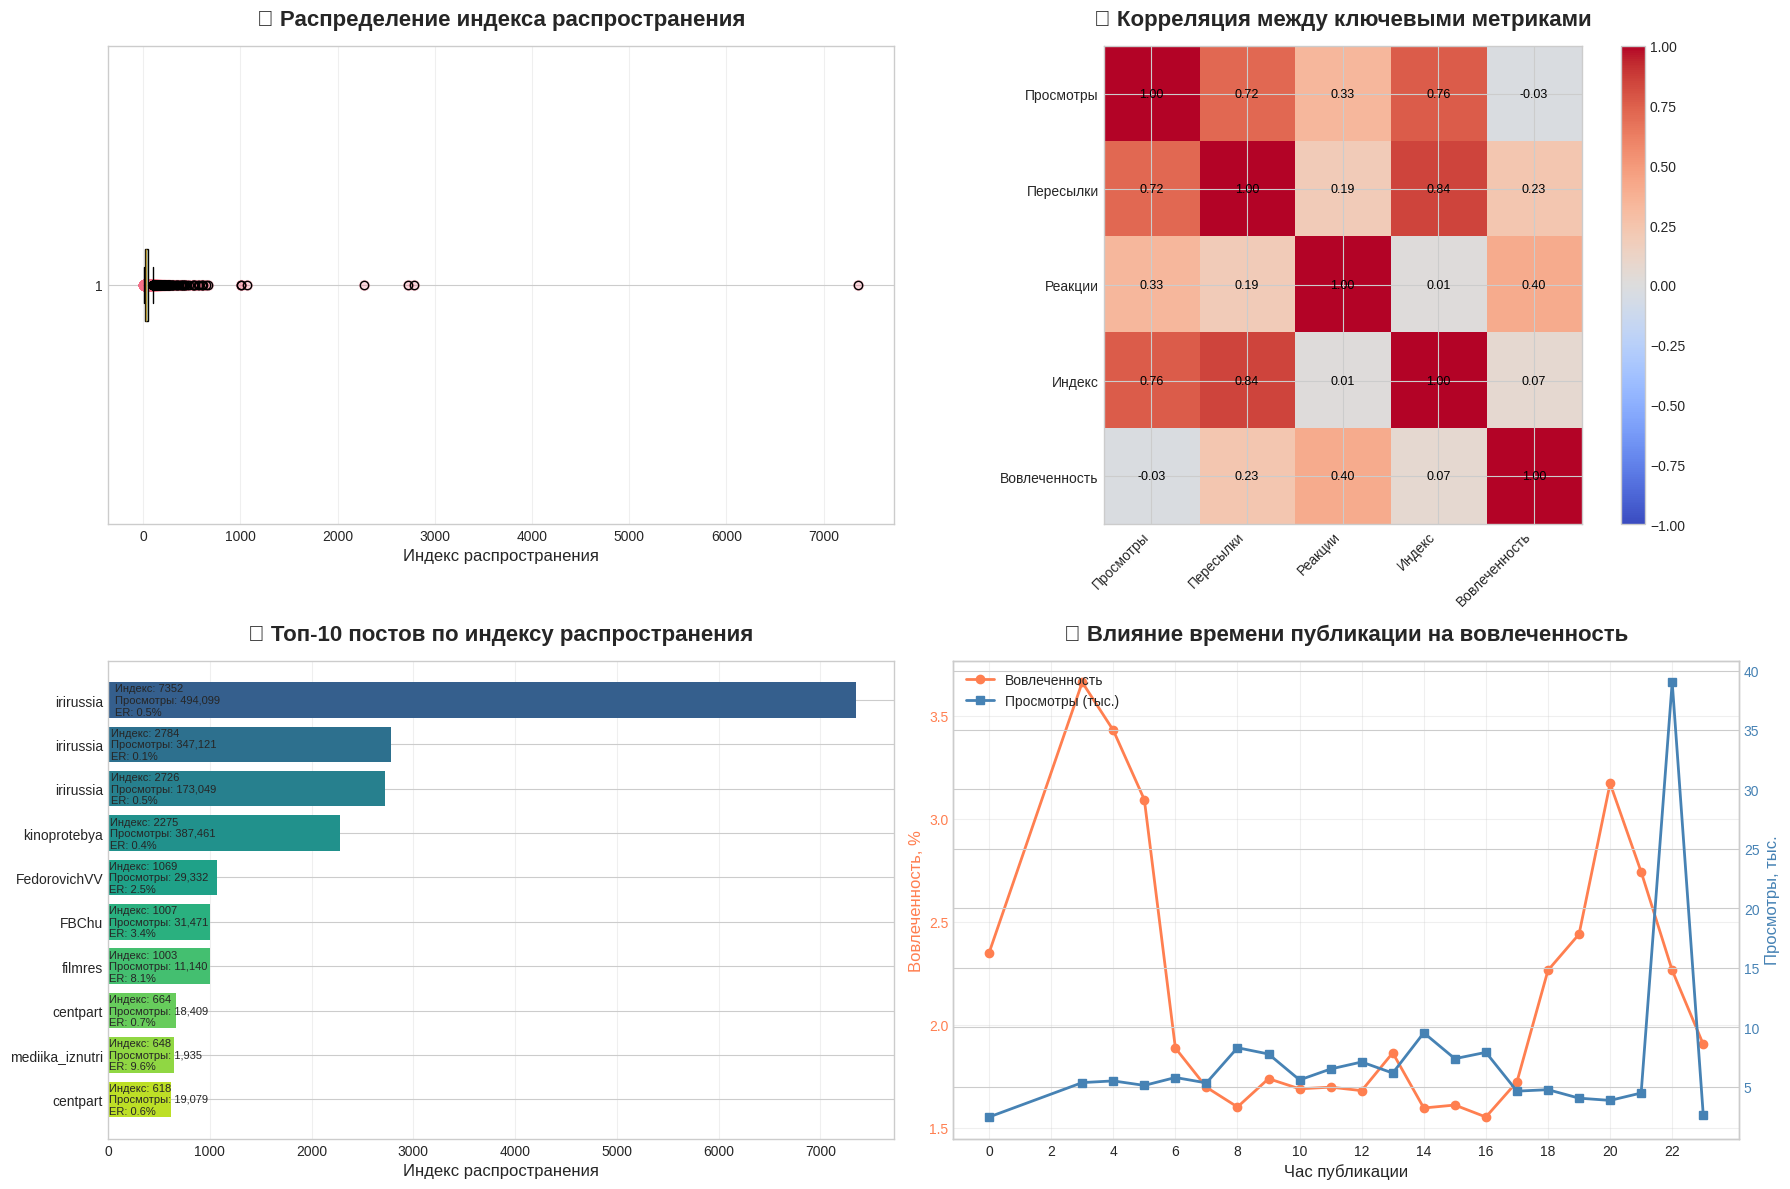

In [ ]:
# 4. АНАЛИЗ ВОВЛЕЧЕННОСТИ И ИНДЕКСА РАСПРОСТРАНЕНИЯ
fig4 = plt.figure(figsize=(18, 12))

# График 4.1: Распределение индекса распространения
ax1 = plt.subplot(2, 2, 1)
ax1.boxplot(posts_df['index'].dropna(), vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'))
ax1.scatter(posts_df['index'], np.ones(len(posts_df)), alpha=0.3, s=50)
ax1.set_xlabel('Индекс распространения', fontsize=12)
ax1.set_title('📈 Распределение индекса распространения', 
              fontsize=16, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, axis='x')

# График 4.2: Корреляция между метриками
ax2 = plt.subplot(2, 2, 2)
metrics = ['views', 'forwards', 'reactions_count', 'index', 'engagement_rate']
corr_matrix = posts_df[metrics].corr()
im = ax2.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax2.set_xticks(range(len(metrics)))
ax2.set_yticks(range(len(metrics)))
ax2.set_xticklabels(['Просмотры', 'Пересылки', 'Реакции', 'Индекс', 'Вовлеченность'], 
                   rotation=45, ha='right', fontsize=10)
ax2.set_yticklabels(['Просмотры', 'Пересылки', 'Реакции', 'Индекс', 'Вовлеченность'], 
                   fontsize=10)

# Добавляем значения в ячейки
for i in range(len(metrics)):
    for j in range(len(metrics)):
        text = ax2.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=9)

plt.colorbar(im, ax=ax2)
ax2.set_title('🔗 Корреляция между ключевыми метриками', 
              fontsize=16, fontweight='bold', pad=15)

# График 4.3: Лучшие посты по индексу распространения
ax3 = plt.subplot(2, 2, 3)
top_posts = posts_df.nlargest(10, 'index')[['channel', 'index', 'views', 'engagement_rate']]
colors_top = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_posts)))
bars3 = ax3.barh(range(len(top_posts)), top_posts['index'], color=colors_top)
ax3.set_yticks(range(len(top_posts)))
ax3.set_yticklabels(top_posts['channel'], fontsize=10)
ax3.invert_yaxis()

for i, (bar, idx, views, er) in enumerate(zip(bars3, top_posts['index'], 
                                              top_posts['views'], top_posts['engagement_rate'])):
    ax3.text(bar.get_width() * 0.01, bar.get_y() + bar.get_height()/2,
             f'Индекс: {idx:.0f}\nПросмотры: {views:,}\nER: {er:.1f}%',
             ha='left', va='center', fontsize=8)

ax3.set_xlabel('Индекс распространения', fontsize=12)
ax3.set_title('🏅 Топ-10 постов по индексу распространения', 
              fontsize=16, fontweight='bold', pad=15)
ax3.grid(True, alpha=0.3, axis='x')

# График 4.4: Взаимосвязь времени публикации и вовлеченности
ax4 = plt.subplot(2, 2, 4)
engagement_by_hour = posts_df.groupby('hour')['engagement_rate'].mean()
views_by_hour = posts_df.groupby('hour')['views'].mean()

ax4_twin = ax4.twinx()
line1, = ax4.plot(engagement_by_hour.index, engagement_by_hour.values, 
                  color='coral', marker='o', linewidth=2, label='Вовлеченность')
line2, = ax4_twin.plot(views_by_hour.index, views_by_hour.values / 1000,
                       color='steelblue', marker='s', linewidth=2, label='Просмотры (тыс.)')

ax4.set_xlabel('Час публикации', fontsize=12)
ax4.set_ylabel('Вовлеченность, %', fontsize=12, color='coral')
ax4_twin.set_ylabel('Просмотры, тыс.', fontsize=12, color='steelblue')
ax4.set_xticks(range(0, 24, 2))
ax4.set_title('⏰ Влияние времени публикации на вовлеченность', 
              fontsize=16, fontweight='bold', pad=15)

lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax4.legend(lines, labels, loc='upper left')

ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='y', labelcolor='coral')
ax4_twin.tick_params(axis='y', labelcolor='steelblue')

plt.tight_layout()
plt.show()